# Handwritten digits recognition

The loader for the MNIST image data was taken from Nielsen's online book,

http://neuralnetworksanddeeplearning.com/chap1.html

See specifically the following link, for downloading the MNIST image data (we only need the mnist.pkl.gz package inside the 'data' subdirectory; store it inside the present directory of the notebook):
https://github.com/mnielsen/neural-networks-and-deep-learning/archive/master.zip


In [32]:
# Import keras library. Also import some of the layers, so we do not need to
# write things like "layers.Dense", but can just write "Dense" instead
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianDropout
import tensorflow.keras.optimizers as optimizers

# Import the numpy library for matrix manipulations etc.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/usr/lib/python3.12/site-packages/tornado/platform/asyncio.py", l

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [16]:
#from numpy import *
from numpy import array, zeros, exp, random, dot, shape, transpose, reshape, meshgrid, linspace, sqrt

# Set up the graphics by importing the matplotlib plotting library
import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = random.RandomState(23455)

import time

In [17]:
"""
mnist_loader
~~~~~~~~~~~~

taken from Nielsen's online book:
http://neuralnetworksanddeeplearning.com/chap1.html


A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc st
rings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='bytes')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    
    global training_inputs, training_results
    global validation_inputs, validation_results
    global test_inputs, test_results
    global num_samples, numpixels, num_test_samples
    
    tr_d, va_d, te_d = load_data()
    
    num_samples=len(tr_d[0])
    training_inputs=zeros([num_samples,numpixels])
    training_results=zeros([num_samples,10])    
    for j in range(num_samples):
        training_inputs[j,:] = reshape(tr_d[0][j], (numpixels))
        training_results[j,:] = vectorized_result(tr_d[1][j])
#    validation_inputs = [reshape(x, (numpixels)) for x in va_d[0]]
#    validation_results = [vectorized_result(y) for y in va_d[1]]

    num_test_samples=len(te_d[0])
    test_inputs=zeros([num_test_samples,numpixels])
    test_results=zeros([num_test_samples,10])    
    for j in range(num_test_samples):
        test_inputs[j,:] = reshape(te_d[0][j], (numpixels))
        test_results[j,:] = vectorized_result(te_d[1][j])

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = zeros((10))
    e[j] = 1.0
    return e

In [7]:
# initialize the network
def init_net():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(30, input_shape=(numpixels,), activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1.0), metrics=['categorical_accuracy'])

In [8]:
# initialize the network
def init_net_large():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(100, input_shape=(numpixels,), activation='relu'))
    net.add(GaussianDropout(0.1))
    net.add(Dense(50, activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1.0), metrics=['categorical_accuracy'])

In [9]:
def test_on(start,stop,dontprint=False):
    global test_inputs, test_results
    global net, predictions_probs, predictions, true_labels
    
    predictions_probs=net.predict_on_batch(test_inputs[start:stop,:])
    predictions=argmax(predictions_probs,axis=1)
    if dontprint==False:
        print("Predictions: ", predictions)
    true_labels=argmax(test_results[start:stop,:], axis=1)
    if dontprint==False:
        print("True labels: ", true_labels)

In [10]:
def display_image(which):
    global test_inputs
    
    plt.imshow(reshape(test_inputs[which,:],[28,28]),interpolation='nearest', cmap='binary')
    plt.show()

In [11]:
def display_image_array(which):
    global test_inputs
    
    numcolumns=8
    BigImage=zeros([28*numcolumns,28*numcolumns])
    for j in range(len(which)):
        x=(j%numcolumns)*28
        y=int(j/numcolumns)*28
        BigImage[x:x+28,y:y+28]=reshape(test_inputs[which[j],:],[28,28])
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.show()

In [12]:
def display_mistakes(maxnum):
    global test_inputs, rest_results, num_test_samples
    global true_labels, predictions, predictions_probs
    
    test_on(0,num_test_samples,dontprint=True)
    which=where(true_labels!=predictions)[0]
    for j in which:
        if j<maxnum:
            display_image(j)
            print("True ", true_labels[j], " - Predicted ", predictions[j], " with prob. ", predictions_probs[j,predictions[j]])
        

## Test out things

In [18]:
numpixels=784
load_data_wrapper() # load all the MNIST images

In [19]:
shape(training_inputs)

(50000, 784)

In [21]:
psi=training_inputs-np.sum(training_inputs,axis=0)/num_samples

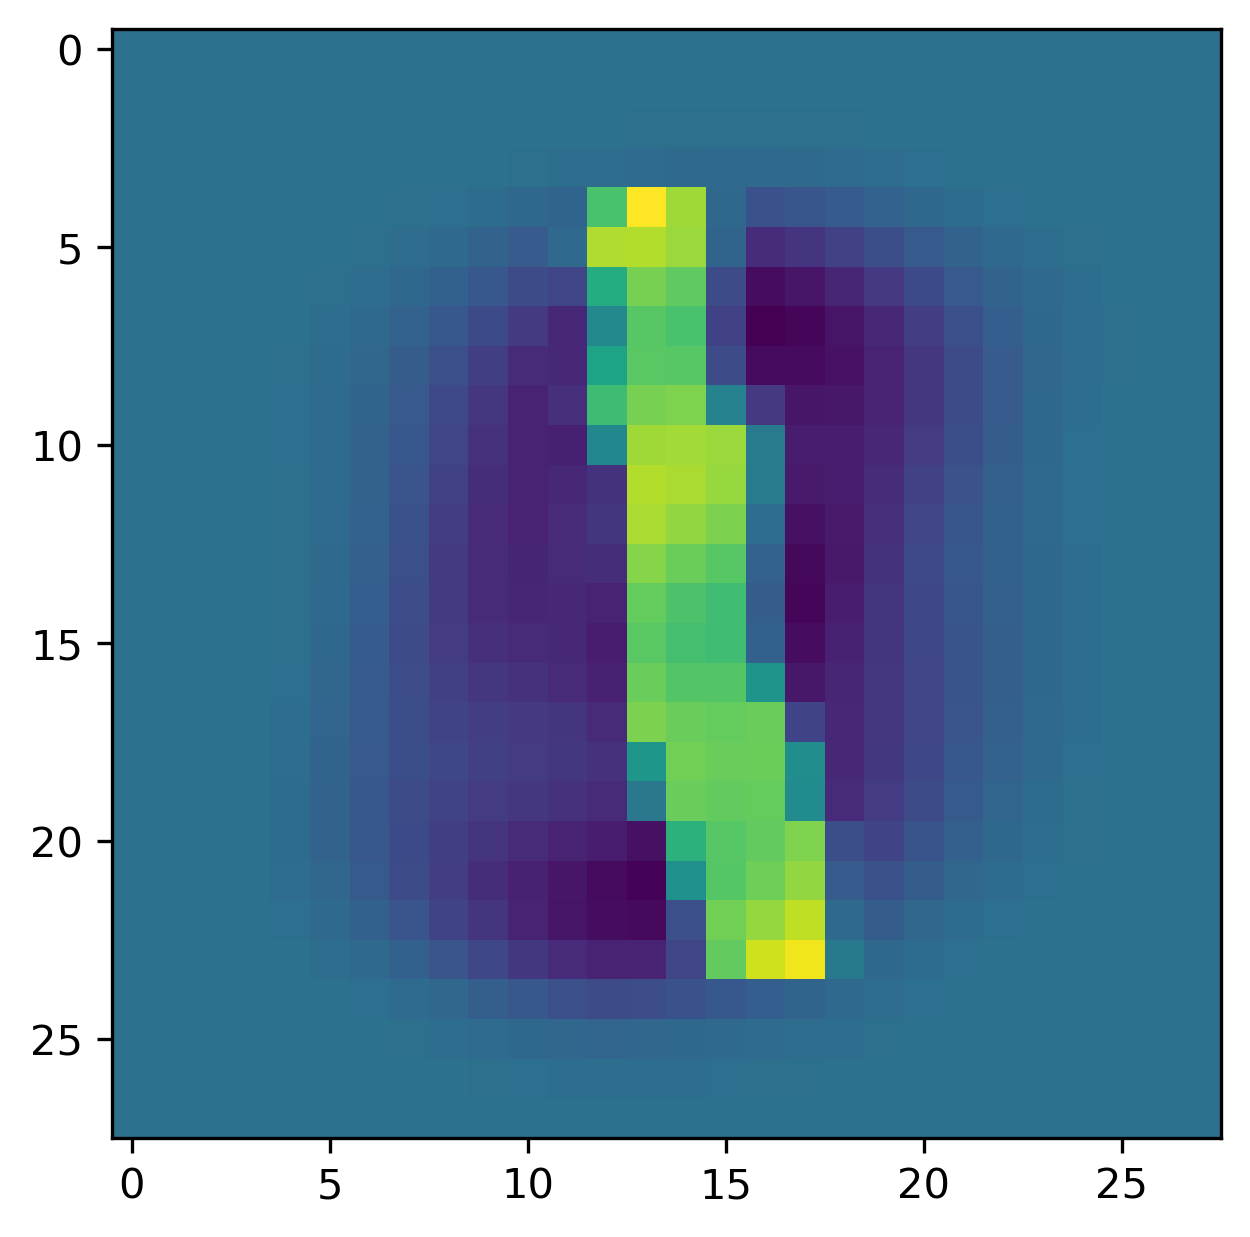

In [23]:
plt.imshow(reshape(psi[6,:],[28,28]))

In [24]:
shape(psi)

(50000, 784)

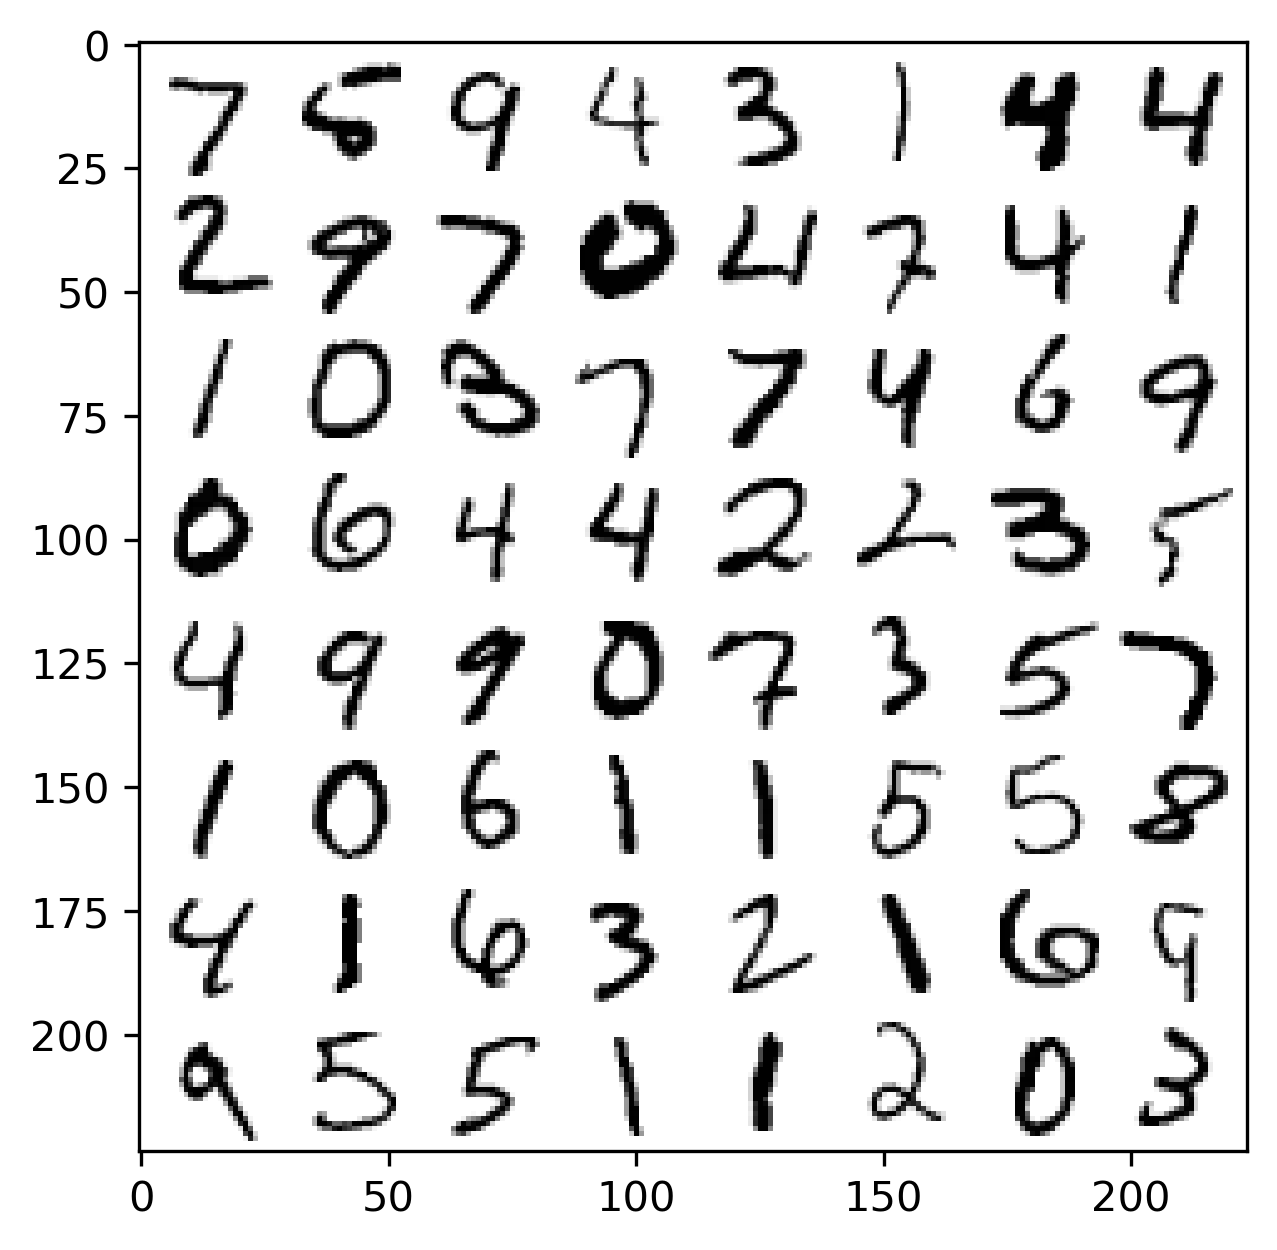

In [29]:
display_image_array(range(8*8))

In [30]:
shape(training_inputs)

(50000, 784)

In [31]:
init_net()

NameError: name 'Sequential' is not defined

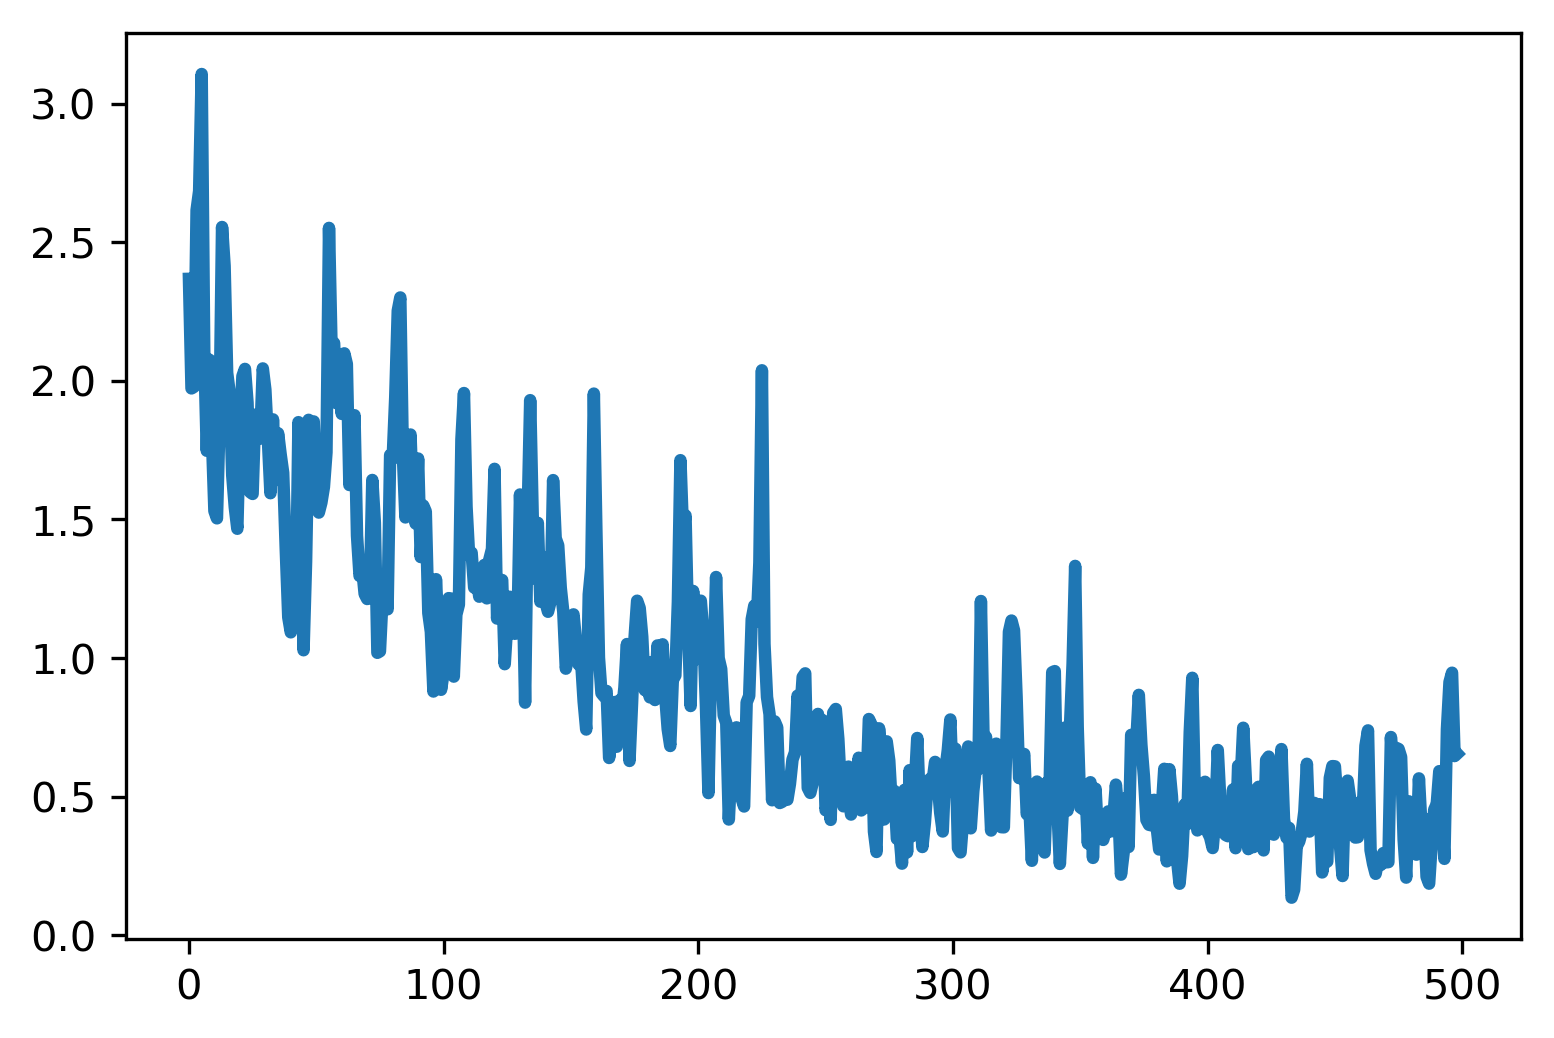

In [29]:
batchsize=100
batches=int(num_samples/batchsize)-1
costs=zeros(batches)
for j in range(batches):
    costs[j]=net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:], training_results[j*batchsize:(j+1)*batchsize,:])[0]
plt.plot(costs,linewidth=3)
plt.show()

In [30]:
test_on(0,20)

Predictions:  [7 3 1 0 4 1 4 4 6 9 0 8 9 0 1 5 9 7 3 4]
True labels:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [31]:
# use the keras "fit" function to go through the whole data set many times ('epochs'), 
# and even set aside some validation samples
history=net.fit(training_inputs,training_results,batch_size=100,
                epochs=30,validation_split=0.1)

Epoch 1/30
450/450 [==============================] - 1s 2ms/step - loss: 0.3496 - categorical_accuracy: 0.8998 - val_loss: 0.3399 - val_categorical_accuracy: 0.9046
Epoch 2/30
450/450 [==============================] - 1s 2ms/step - loss: 0.2975 - categorical_accuracy: 0.9142 - val_loss: 0.3400 - val_categorical_accuracy: 0.9046
Epoch 3/30
450/450 [==============================] - 1s 2ms/step - loss: 0.2821 - categorical_accuracy: 0.9188 - val_loss: 0.3549 - val_categorical_accuracy: 0.8960
Epoch 4/30
450/450 [==============================] - 1s 2ms/step - loss: 0.2676 - categorical_accuracy: 0.9228 - val_loss: 0.3080 - val_categorical_accuracy: 0.9166
Epoch 5/30
450/450 [==============================] - 1s 2ms/step - loss: 0.2619 - categorical_accuracy: 0.9240 - val_loss: 0.3057 - val_categorical_accuracy: 0.9166
Epoch 6/30
450/450 [==============================] - 1s 2ms/step - loss: 0.2485 - categorical_accuracy: 0.9276 - val_loss: 0.3407 - val_categorical_accuracy: 0.9024
Epoc

In [32]:
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True)
which=where(true_labels!=predictions)[0]
print(len(which)/num_test_samples)

0.0676


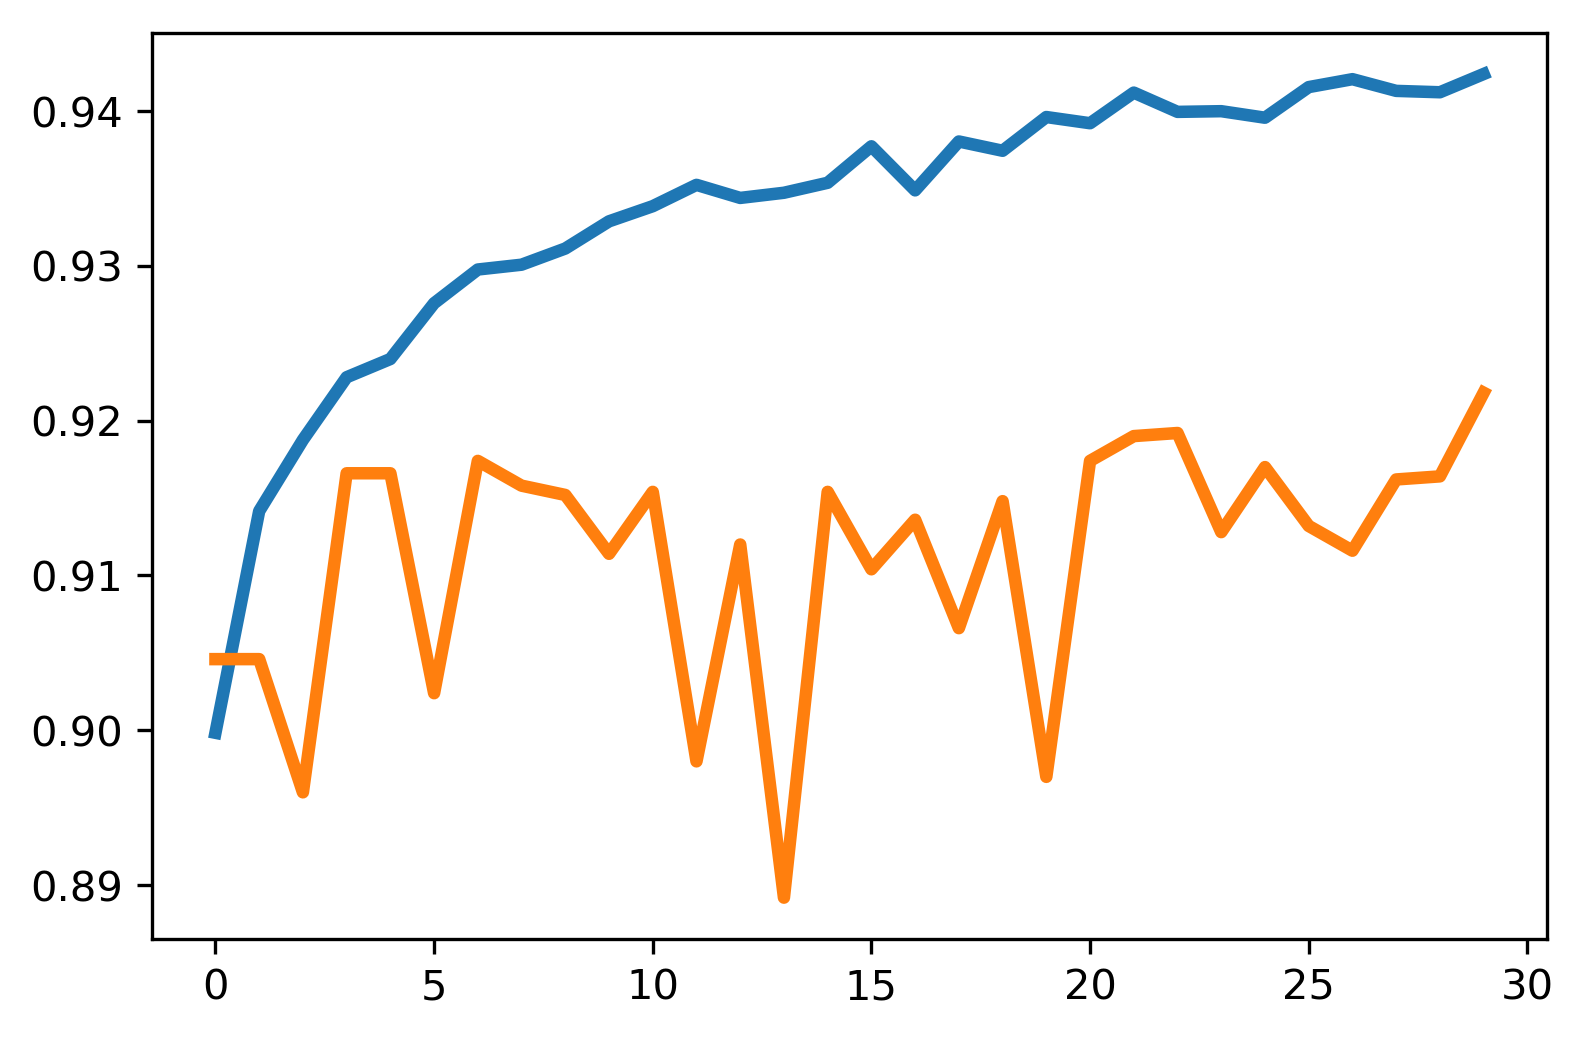

In [33]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()
#fig.savefig("Handwritten_MNIST_Fig1_Accuracy.pdf")
#fig.savefig("Handwritten_MNIST_Fig2_AccuracyAndValidation.pdf")
#fig.savefig("Handwritten_MNIST_Fig4_100_50_DropOut_AccuracyAndValidation.pdf")

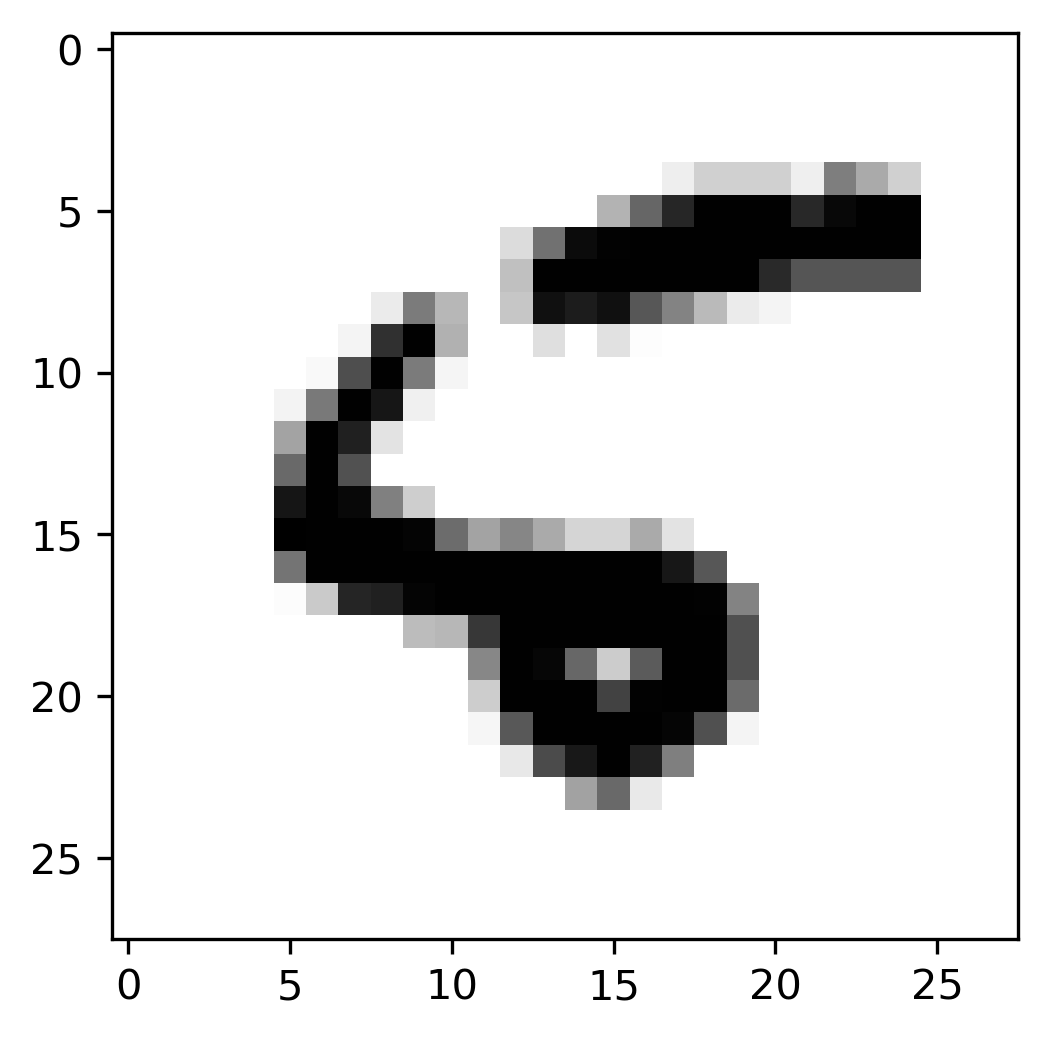

True  5  - Predicted  6  with prob.  0.999982


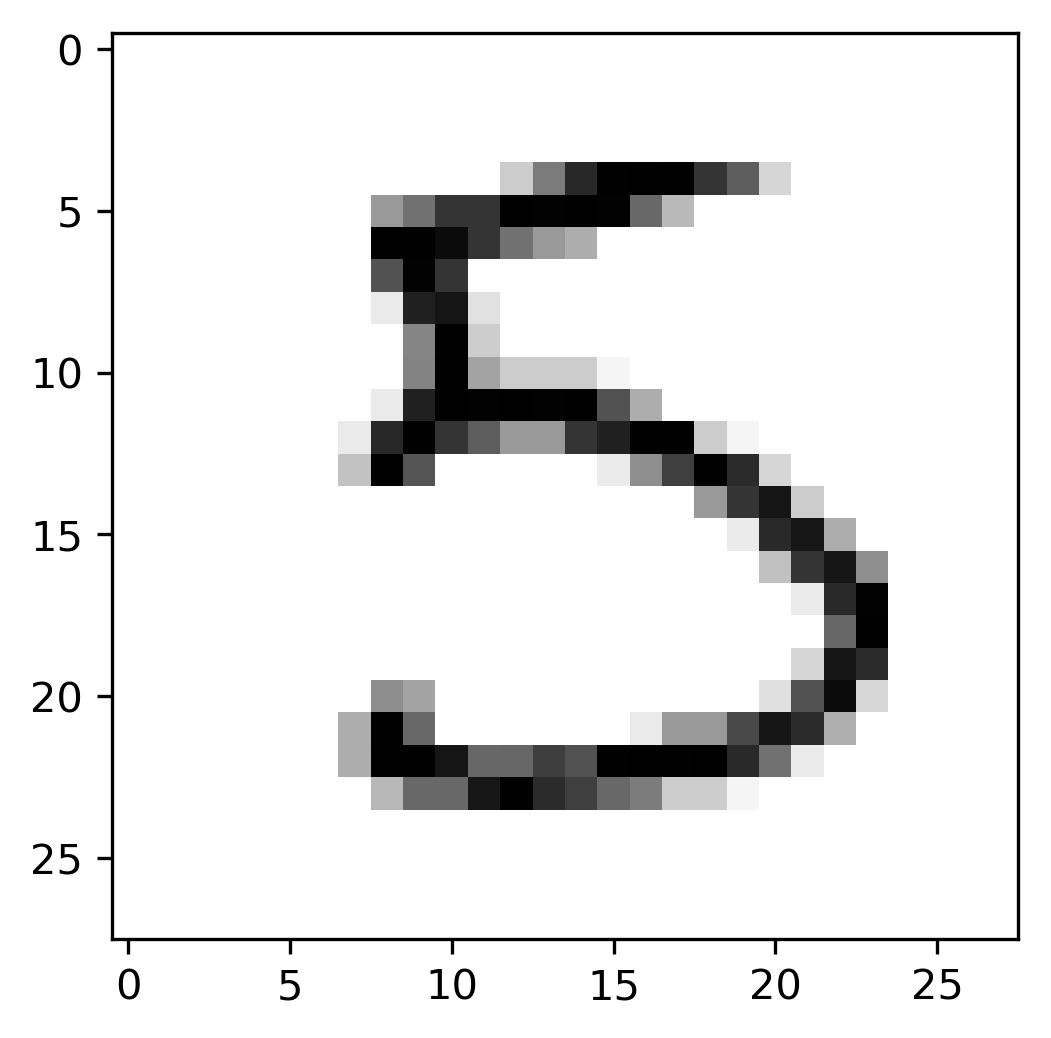

True  5  - Predicted  3  with prob.  0.54224753


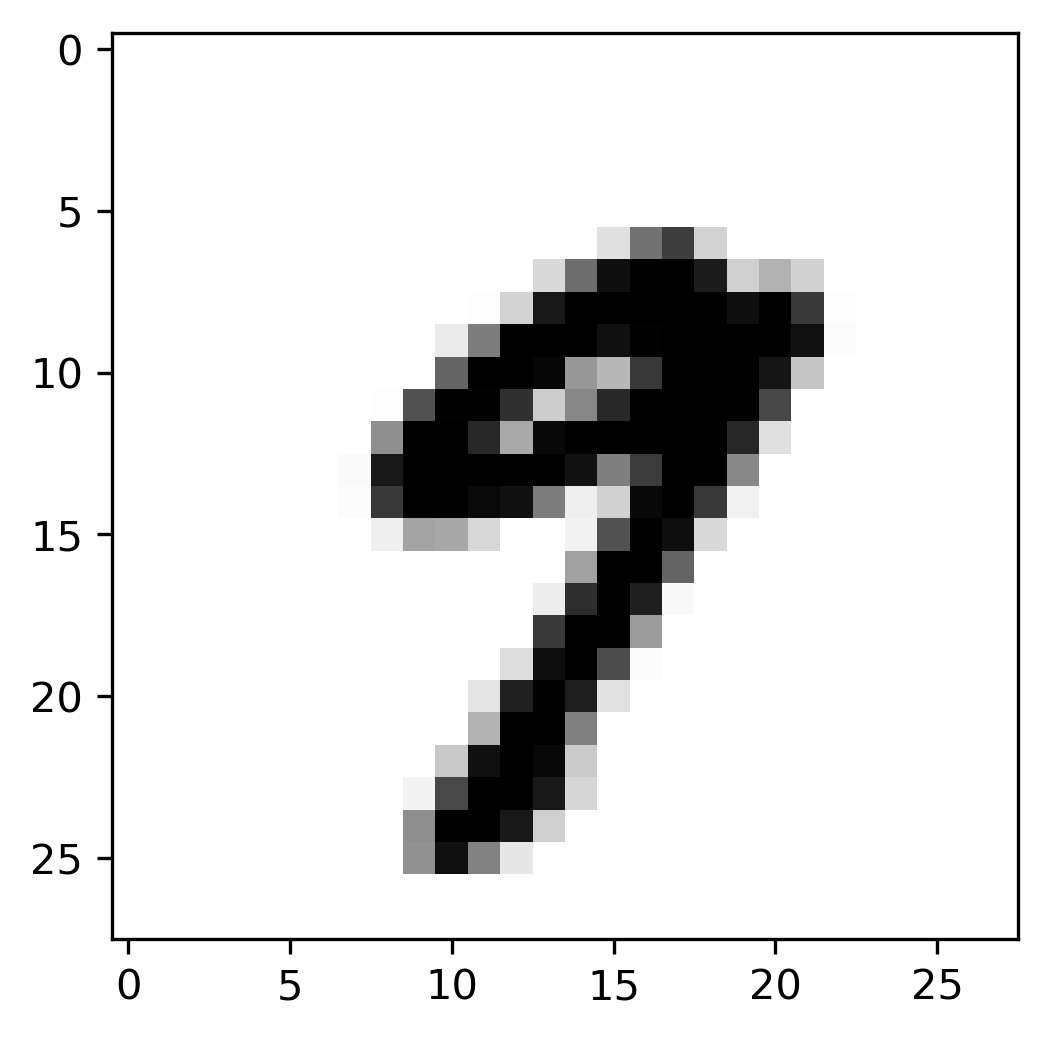

True  9  - Predicted  7  with prob.  0.7327373


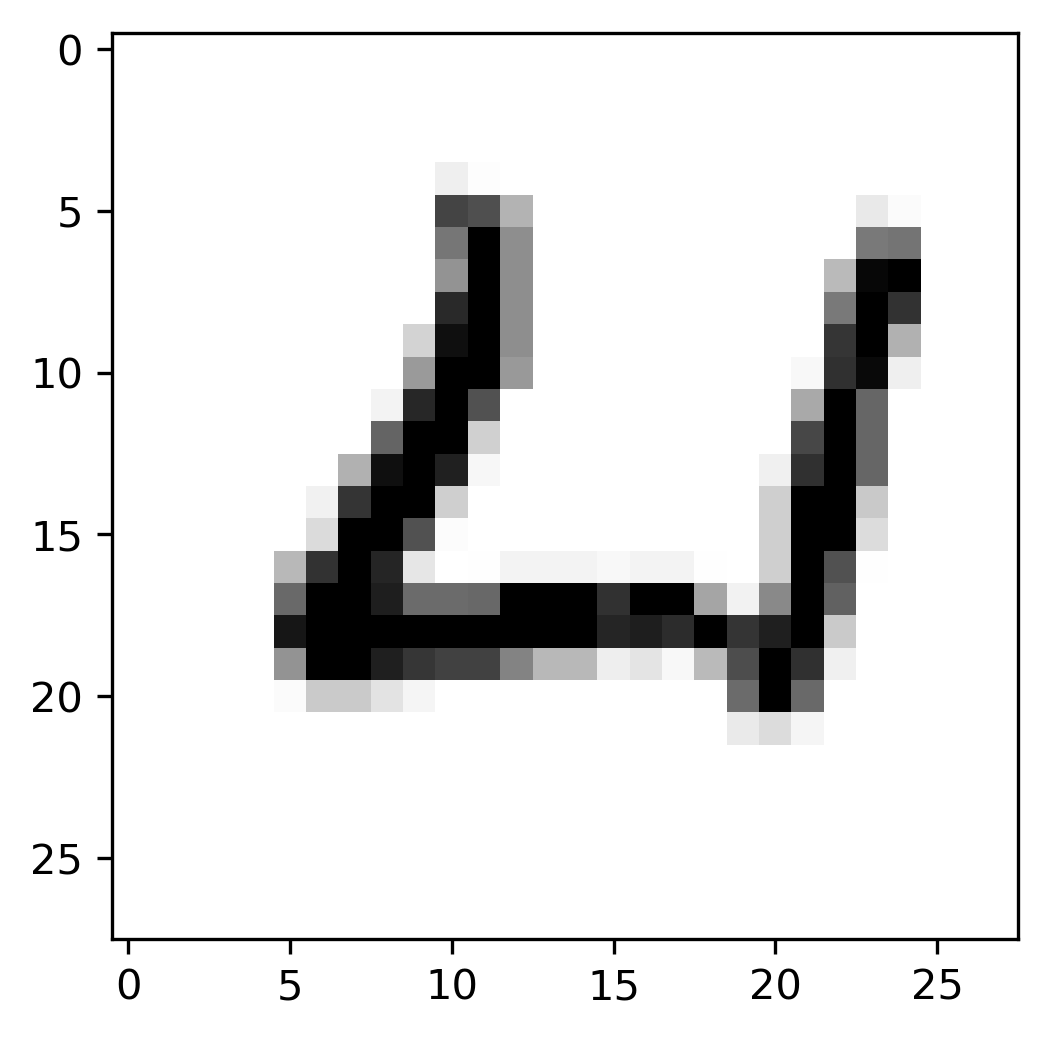

True  4  - Predicted  0  with prob.  0.47136846


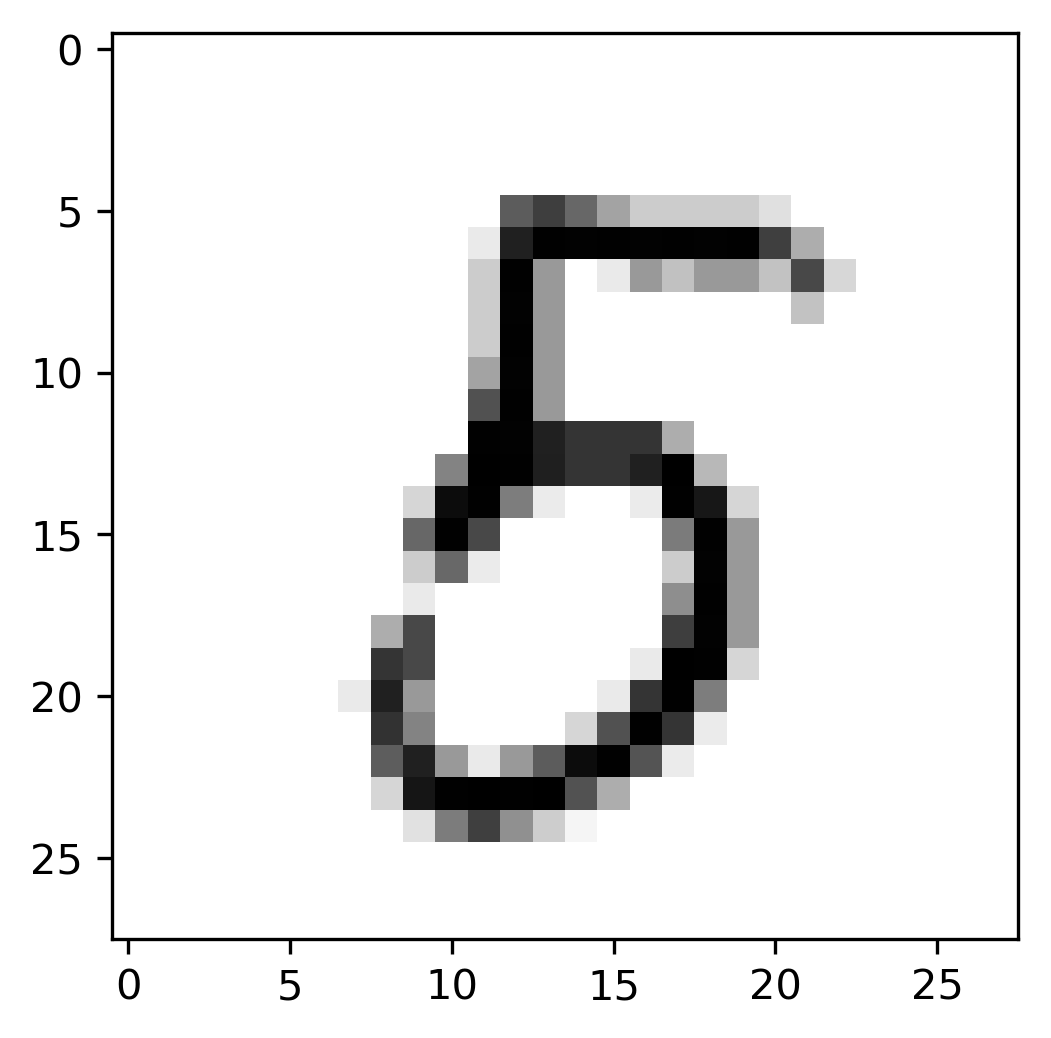

True  5  - Predicted  3  with prob.  0.7615138


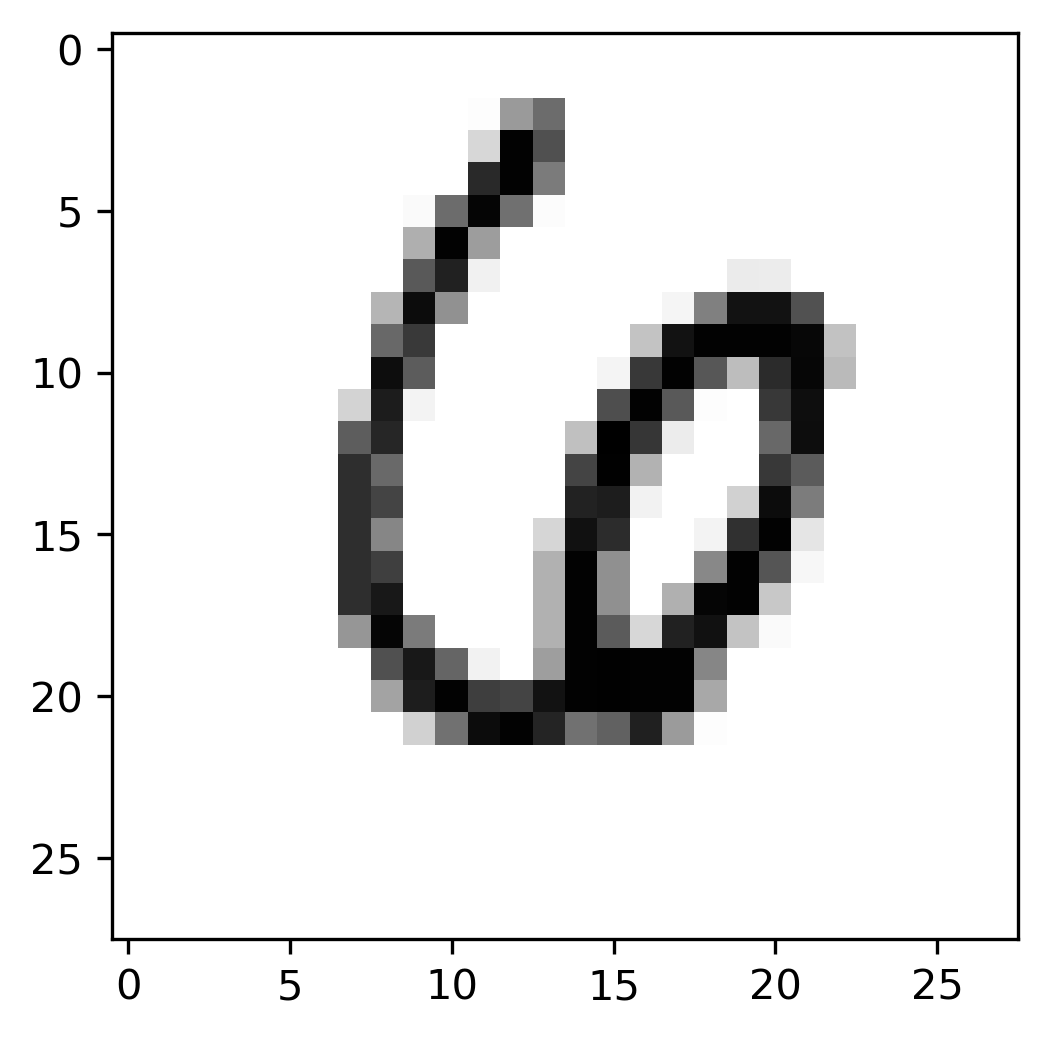

True  6  - Predicted  8  with prob.  0.8517948


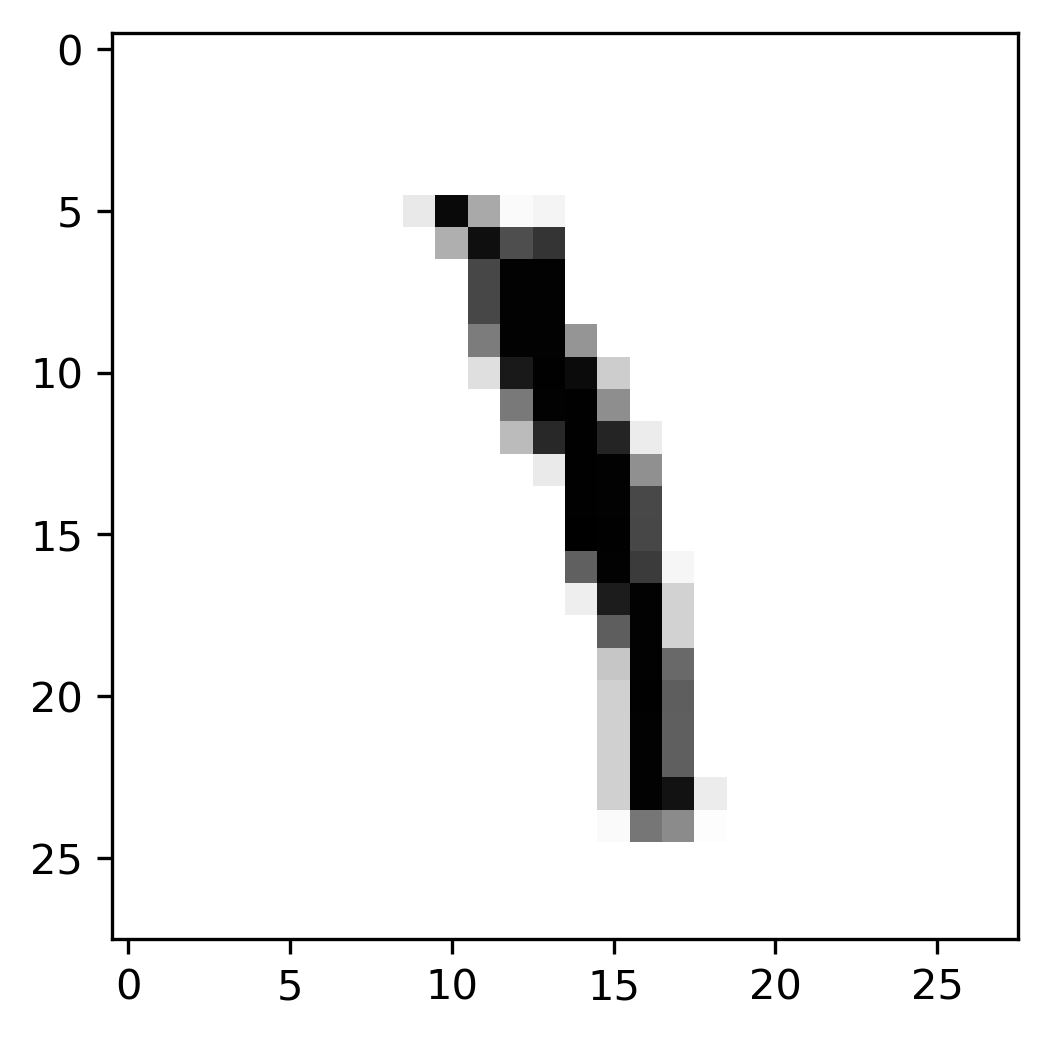

True  1  - Predicted  9  with prob.  0.89239544


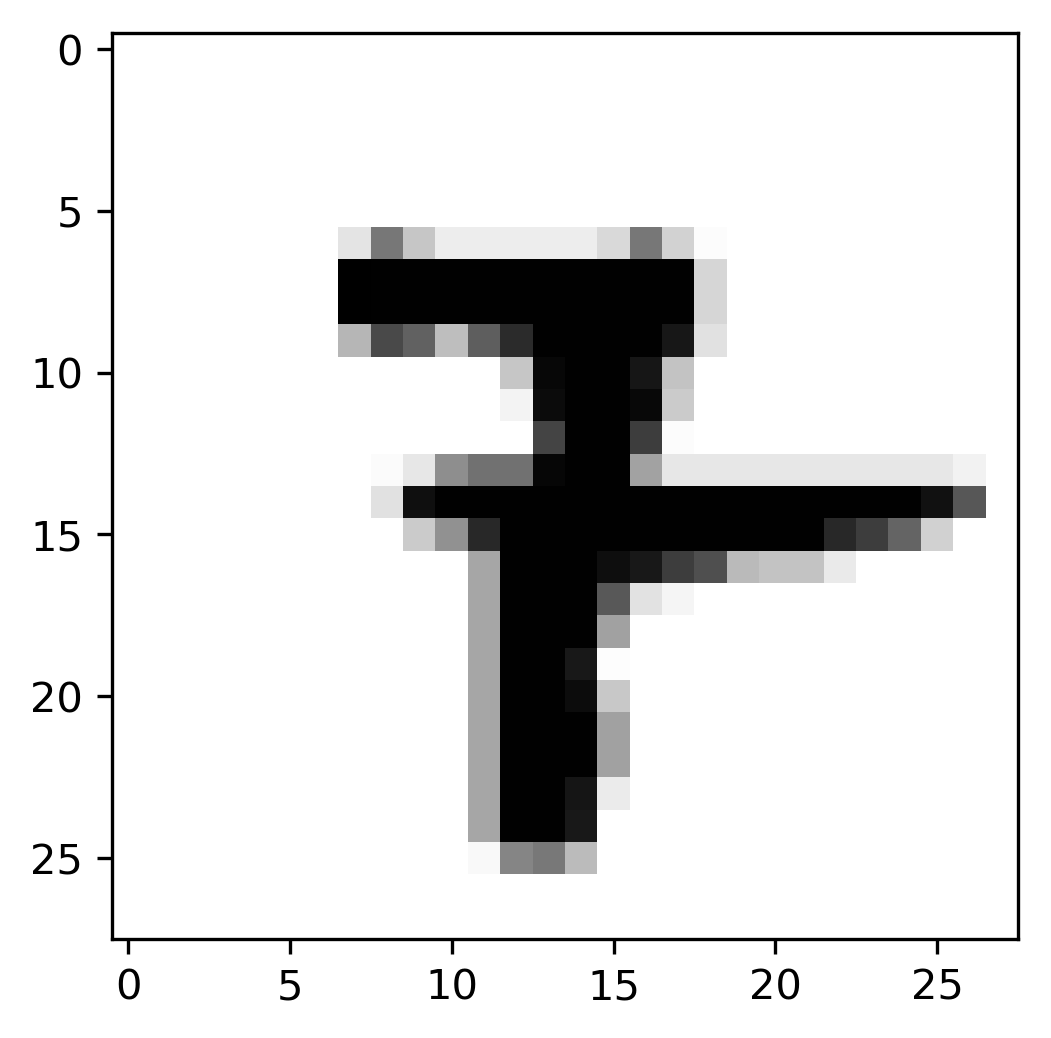

True  7  - Predicted  3  with prob.  0.44986218


In [34]:
display_mistakes(100)